# Covariance

is a measure of the joint variability of two random variables (e.g. X and Y).

- `cov(X, Y) > 0`: If the greater values of one variable(X) mainly correspond with the greater values of the other variable(Y), and the same holds for the lesser values
- `cov(X, Y) < 0`: In the opposite case, when the greater values of one variable(X) mainly correspond to the lesser values of the other(Y)

https://en.wikipedia.org/wiki/Covariance

### Definition
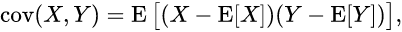

For discrete random variables
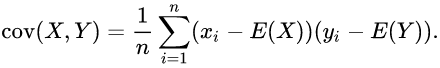

### Uncorrelatedness and independence

- Independent (Random) variables are uncorrelated -> cov=0, thus E[XY] = E[X]E[Y]
- cov=0 only tells variables are uncorrelated, but not necessarily independ

---

# Pearson correlation

also called bivariate correlation, measures the **linear correlation between** two variables X and Y.

it has a value between +1 and −1, where

- 1 is total positive linear correlation
- 0 is no linear correlation
- −1 is total negative linear correlation 

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

### definition
For a population
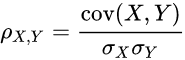

For a sample
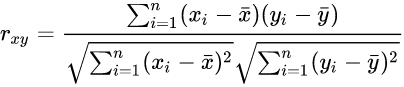

---

# Coefficient of determination

is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

`R^2 = 1 - SSres/SStol`

It describes the goodness-of-fit of the regression. The best score is 1, the higher R^2 is, the better the fit is. It is **not limited** to linear regressions.

If R2 = 0.7, it means 70% of the variance of the dependent variable could be explained by the regression.

https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions


#### In least squares regression analysis, `0 <= R^2 = SSreg = r^2 <= 1`

### Relationship between R2 and MSE
R2 is a normalized version of MSE, we use MSE for reporting because it's a simple metric and it is technically the loss-function we are minimizing when we solve the normal equations.

R2 is useful because it is often easier to interpret since it doesn't depend on the scale of the data.

As a concrete example, consider two models: one predicting income and the other predicting age, R2 will make it easier to state which model is performing better.

*In general, this isn't a great idea and you shouldn't compare metrics like R2 across different models to make these sorts of claims because some things are just fundamentally harder to predict than others (e.g., stock markets vs. who survived the Titanic).*

---

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns

Generate a dataset with 3 columns A, B and C.
- A and B are possitive correlated ( not strong, by introducing massive noice)
- A and C are negative correlated ( strong, by introducing small noice

In [2]:
# values in A would go down and then up
A = np.arange(50)
A = np.concatenate([np.flip(A), A])

# B = 3*A - 5 + noice, however noice is big
B = 3 * A - 5 + np.random.normal(0, 100,100)

# C = -A + 4 + noice, noice is small
C = -1 * A + 4 + np.random.normal(0, 5, 100)

data = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)], columns=['dogs', 'cats'])
data = pd.DataFrame({'A': A, 'B': B, 'C': C})
data.head()

,A,B,C
0,49,174.885427,-47.089068
1,48,10.208462,-43.564591
2,47,61.610024,-36.953932
3,46,259.077029,-45.141806
4,45,99.445274,-49.885505


Calculate the correlation matrix for A, B and C.

Then plot the samples to verify

In [3]:
data.corr()

,A,B,C
A,1.000000,0.295609,-0.948693
B,0.295609,1.000000,-0.272986
C,-0.948693,-0.272986,1.000000


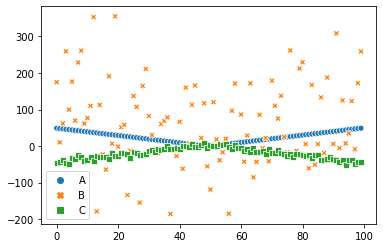

In [4]:
sns.scatterplot(data=data)

In [5]:
# the above B and C could be treated as prediction according to A
# than true values of B and C, without noices should be
B_true = 3 * A + 5
C_true = -1 * A + 4

r2_B = r2_score(B_true, B)
r2_C = r2_score(C_true, C)

print(f"R squared of prediction of B is: {r2_B}")
print(f"R squared of prediction of C is: {r2_C}")

R squared of prediction of B is: -5.349639095282639
R squared of prediction of C is: 0.8884234313558284
